# Arduino code used to get the create the dataset for the system. #




```

#include <DHT.h>
#define Type DHT22
int sensePin=3;
DHT HT(sensePin,Type);
float humidity;
float tempC;
float tempF;

int setTime = 500;
int delayTime = 7000;
int countDown = 1000;

void setup() {
    Serial.begin(9600);
    HT.begin();
    delay(setTime);
}

void loop() {
    humidity=HT.readHumidity();
    tempC=HT.readTemperature();
    tempF=HT.readTemperature(true);
    Serial.print(">>>Reading Humidity and Sensor in ");
    delay(countDown);
    Serial.print("3,");
    delay(countDown);
    Serial.print("2,");
    delay(countDown);
    Serial.println("1...");
    Serial.print("Humidity: ");
    Serial.print(humidity);
    Serial.print(" || Temperature C: ");
    Serial.print(tempC);
    Serial.print("°C");
    Serial.print(" || Temperature F: ");
    Serial.print(tempF);
    Serial.println("°F");
    delay(delayTime);
}

```

# Data Visualization & Preprocessing

### Necessary Inputs

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Reading Dataset

In [22]:
fab_test = pd.read_csv("/content/drive/MyDrive/CSE427/Lab/Project/humidity_temp_dataset.csv")

### Describing Dataset

In [23]:
fab_test.head()

,Humidity,Temperature C,Room Temp,Room Humidity,Dry/Wet
0,73.5,31.0,31.0,73.1,Dry
1,80.9,30.8,31.0,73.1,Wet
2,81.9,30.7,31.0,73.1,Wet
3,80.1,30.6,31.0,73.1,Wet
4,76.4,30.6,31.0,73.1,Dry


In [24]:
fab_test.describe()

,Humidity,Temperature C,Room Temp,Room Humidity
count,182.000000,182.000000,182.000000,182.000000
mean,76.412088,30.369780,30.674725,67.548352
std,6.748912,0.987725,0.394042,4.939353
min,63.000000,27.600000,30.200000,62.300000
25%,71.600000,30.000000,30.200000,62.300000
50%,75.400000,30.500000,31.000000,66.500000
75%,81.900000,31.000000,31.000000,73.100000
max,90.000000,31.900000,31.000000,73.100000


### Unique Value Check

In [25]:
fab_test.nunique()

,0
Humidity,116
Temperature C,38
Room Temp,2
Room Humidity,3
Dry/Wet,2


### Checking the dataset of different column

In [26]:
fab_test.dtypes

,0
Humidity,float64
Temperature C,float64
Room Temp,float64
Room Humidity,float64
Dry/Wet,object


### Encoading Target Value

In [27]:
unique_result = fab_test['Dry/Wet'].unique()
print(unique_result)


['Dry' 'Wet']


In [28]:
fab_test.loc[fab_test["Dry/Wet"] == "Dry", "Dry/Wet"] = 0
fab_test.loc[fab_test["Dry/Wet"] == "Wet", "Dry/Wet"] = 1
fab_test['Dry/Wet'] = fab_test['Dry/Wet'].astype(int)

### Checking the Dataset

In [29]:
fab_test.head(10)

,Humidity,Temperature C,Room Temp,Room Humidity,Dry/Wet
0,73.5,31.0,31.0,73.1,0
1,80.9,30.8,31.0,73.1,1
2,81.9,30.7,31.0,73.1,1
3,80.1,30.6,31.0,73.1,1
4,76.4,30.6,31.0,73.1,0
5,73.9,30.8,31.0,73.1,0
6,73.6,30.9,31.0,73.1,0
7,73.6,30.9,31.0,73.1,0
8,73.1,31.1,31.0,73.1,1
9,81.2,31.2,31.0,73.1,1


### Histogram of the Dataset

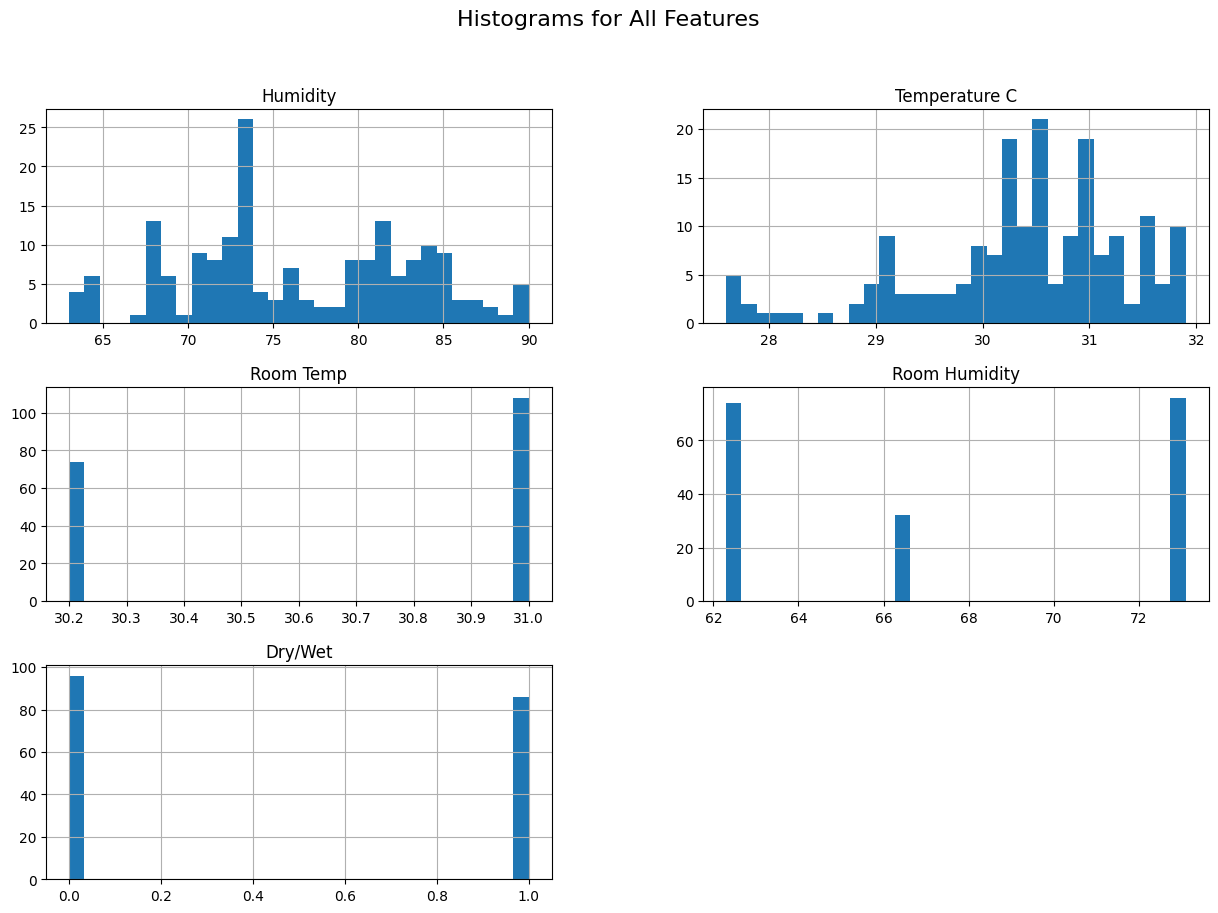

In [30]:
fab_test.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for All Features', fontsize=16)
plt.show()


### Box Plot

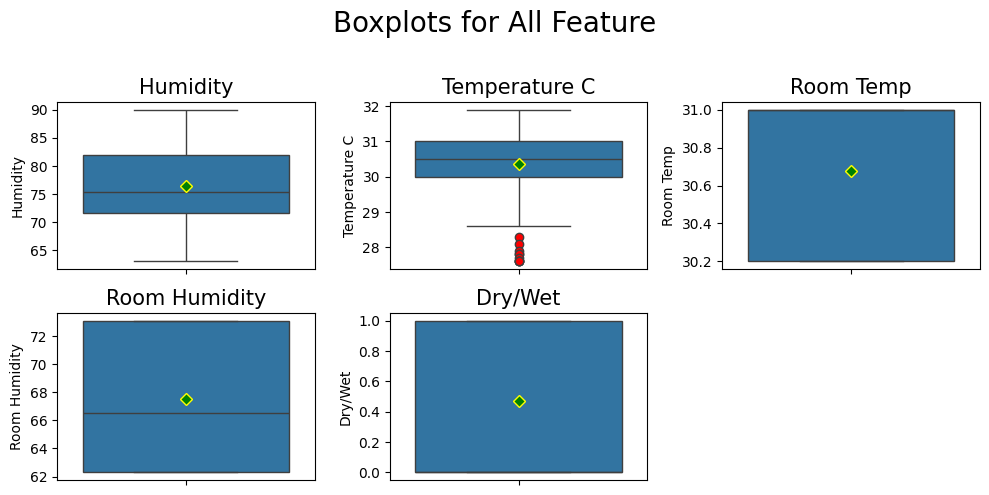

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle("Boxplots for All Feature", size=20)

labels_list = list(fab_test.columns)
idx = 0
red_circle = dict(markerfacecolor='red', marker='o')
green_diamond = dict(markerfacecolor='green', marker='D', markeredgecolor='yellow')

for i in range(2):
    for j in range(3):
        if idx < len(labels_list):
            sns.boxplot(ax=axes[i, j],
                        data=fab_test[labels_list[idx]],
                        flierprops=red_circle,
                        showmeans=True,
                        meanprops=green_diamond)
            axes[i, j].set_title(labels_list[idx], fontsize=15)
            idx += 1
        else:
            axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Data Heatmap

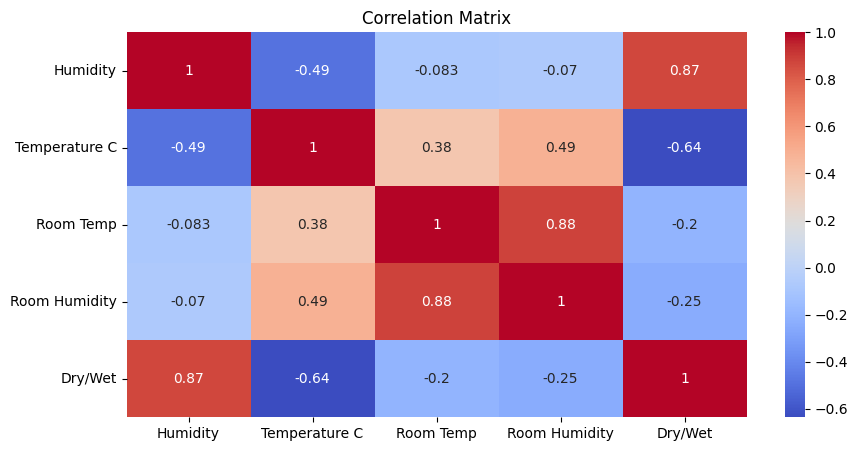

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(fab_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Target Class Analysis

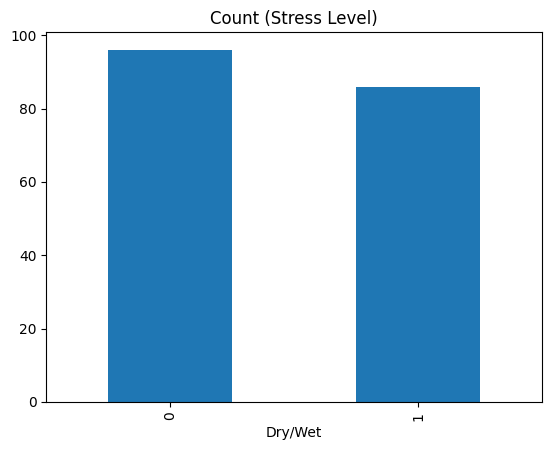

In [45]:
fab_test["Dry/Wet"].value_counts().plot(kind='bar', title='Count (Stress Level)');

# Model Building

### Train-Test Split

In [75]:
X = fab_test.drop(columns=["Dry/Wet"])
y = fab_test["Dry/Wet"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression

### Model

In [86]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_regression_model.fit(X_train, y_train)

y_pred2 = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.94      1.00      0.97        17

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



### Confusion Matrix

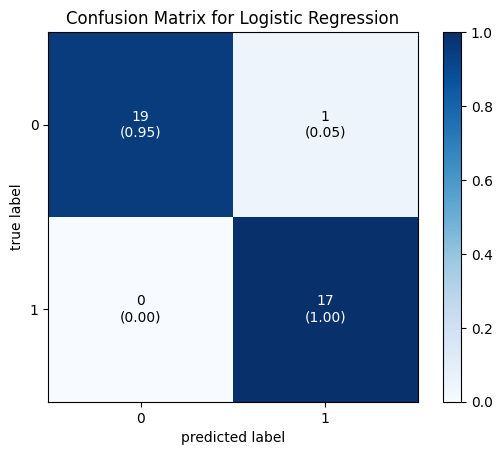

In [87]:
cnf_matrix_lr = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(conf_mat=cnf_matrix_lr,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## Random Forest

### Model

In [88]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



### Confusion Matrix

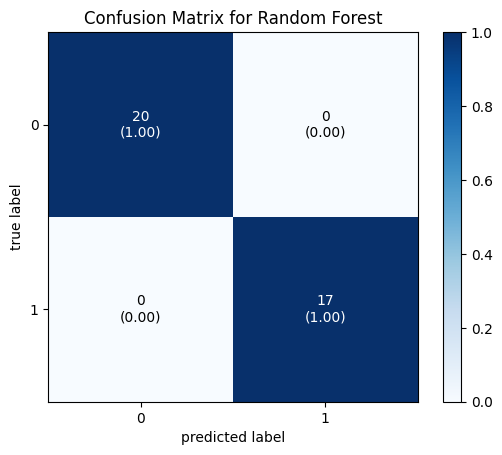

In [89]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cnf_matrix_rf,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Model Comparison

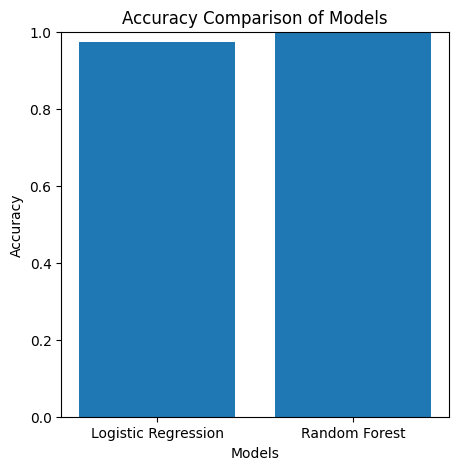

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, accuracy2]

plt.figure(figsize=(5, 5))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()

# Testing with Manual Data

In [92]:
for feature in (X.columns.tolist()):
    print(feature)

Humidity
Temperature C
Room Temp
Room Humidity


In [96]:
category_mapping_decode = {
    "Dry":0,
    "Wet":1,
    }

humidity = float(input(("Enter Humidity: ")))
temperature = float(input("Enter Temperature: "))
room_temp = float(input("Enter Your Room Temperature: "))
room_humidity = float(input("Enter Your Room Humidity: "))

random_input_df = pd.DataFrame(
    [[humidity,
      temperature,
      room_temp,
      room_humidity]],
    columns=X.columns
)

pred_1 = random_forest_model.predict(random_input_df)
print()
print("===========================")
if pred_1[0] == 0:
    print("This fabric is Dry")
if pred_1[0] == 1:
    print("This Fabric is Wet")

Enter Humidity: 71.3
Enter Temperature: 31.5
Enter Your Room Temperature: 33.5
Enter Your Room Humidity: 33

This fabric is Dry
